In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
movies_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [61]:
print('Movies_df Shape:',movies_data.shape)
print('Ratings_df Shape:',ratings_data.shape)

Movies_df Shape: (9742, 3)
Ratings_df Shape: (100836, 4)


In [62]:
movies_data['year'] = movies_data.title.str.extract('(\d\d\d\d)',expand=True)
movies_data['title'] = movies_data.title.str.replace('(\(\d\d\d\d\))', '')
movies_data['title'] = movies_data['title'].apply(lambda x: x.strip())
movies_data.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [63]:
movies_data.isna().sum()

movieId     0
title       0
genres      0
year       12
dtype: int64

In [64]:
movies_data.year.fillna(0, inplace=True)

In [65]:
genres = movies_data['genres'].str.get_dummies('|')
movies_data_with_genres = pd.concat([movies_data, genres], axis=1)
movies_data_with_genres.head(5)

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
ratings_data.drop('timestamp', axis=1, inplace=True)
ratings_data.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [67]:
A = ratings_data.pivot(index='userId', columns='movieId', values='rating')
A

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
A = A.fillna(0)
A

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
u1 = A.loc[1]
u2 = A.loc[5]
dot = np.dot(u1, u2)
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.12907989044170284

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(A)
pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
606,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
607,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055
608,0.093572,0.027565,0.000000,0.032198,0.261232,0.214234,0.090840,0.423993,0.000000,0.021766,...,0.035653,0.335231,0.061941,0.236601,0.097610,0.069622,0.149190,0.121993,1.000000,0.053225


<Axes: >

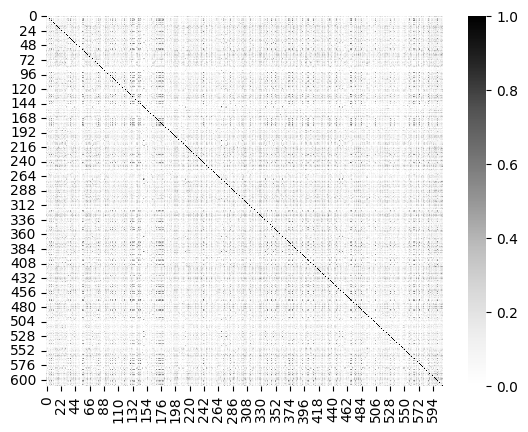

In [14]:
import seaborn as sns
sns.heatmap(sim_matrix, cmap='Greys')

In [27]:
def k_nearest_neighbors(A, u, k):
    u_index = A.index.get_loc(u)
    sim_matrix = cosine_similarity(A)
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    return A.index[k_nearest]

In [28]:
k_nearest_neighbors(A, 1, 5)

Int64Index([39, 493, 96, 164, 494], dtype='int64', name='userId')

In [29]:
def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [30]:
sh_neigh = show_neighbors(A, 2, 5)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix_A = cosine_similarity(sh_neigh)
pd.DataFrame(sim_matrix_A)

,0,1,2,3,4,5
0,1.000000,0.300074,0.280425,0.276010,0.254157,0.242497
1,0.300074,1.000000,0.265772,0.401215,0.215606,0.379858
2,0.280425,0.265772,1.000000,0.350292,0.218716,0.338235
3,0.276010,0.401215,0.350292,1.000000,0.250537,0.489676
4,0.254157,0.215606,0.218716,0.250537,1.000000,0.281184
5,0.242497,0.379858,0.338235,0.489676,0.281184,1.000000


In [31]:
neighbors = k_nearest_neighbors(A, 1, 5)

In [32]:
def predict_rating(A, u, m, k=5):
    neighbors = k_nearest_neighbors(A, u, k)
    df = A.loc[[u] + list(neighbors)]
    ratings = df[m]
    mean = ratings[1:][ratings != 0].mean()
    return mean

In [35]:
predict_rating(A, 66, 2, k=5)

0.7

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
## how to initialize a numpy array with nan vlaues of size 610,9742
# np.full((610, 9742), np.nan)
# np.full((3, 5), np.nan)

In [115]:
import tqdm
A = np.full((610, 9742), np.nan)
for i in tqdm.tqdm(range(len(ratings_data))):
    A[int(ratings_data.iloc[i][0]-1)][movies_data[movies_data['movieId'] == ratings_data.iloc[i][1]].index[0]] = ratings_data.iloc[i][2]

 21%|██        | 20967/100836 [00:20<01:15, 1054.80it/s]

In [54]:
A.shape
A_tensor = torch.tensor(A)

In [55]:
A_tensor

tensor([[4.0000,    nan, 4.0000,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        ...,
        [2.5000, 2.0000, 2.0000,  ...,    nan,    nan,    nan],
        [3.0000,    nan,    nan,  ...,    nan,    nan,    nan],
        [5.0000,    nan,    nan,  ...,    nan,    nan,    nan]],
       dtype=torch.float64)

In [56]:
mask = ~torch.isnan(A_tensor)
mask

tensor([[ True, False,  True,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False]])

In [57]:
mask.sum()

tensor(100836)

In [68]:
movies_W = movies_data_with_genres.drop(['title', 'genres', 'year','movieId'], axis=1)

In [77]:
H = torch.tensor(movies_W.values)
H = H.T
H

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [78]:
H.shape

torch.Size([20, 9742])

In [72]:
A_tensor.shape

torch.Size([610, 9742])

In [81]:
W

tensor([[-1.0982e+00,  7.9696e-01,  2.5895e+00,  ...,  3.7644e-01,
         -1.3297e-01, -1.7279e-01],
        [ 1.2622e+00,  3.9091e-03, -2.5750e-01,  ..., -9.6769e-01,
         -8.4850e-01,  1.3679e+00],
        [-1.0143e+00,  1.1034e+00, -1.5307e-01,  ...,  1.9917e-01,
          5.0953e-01,  3.3176e-01],
        ...,
        [-1.3532e-02,  2.1213e+00, -1.7982e+00,  ...,  4.8467e-04,
         -2.0282e+00,  2.9277e-01],
        [-1.2248e+00, -1.6215e+00,  8.8861e-02,  ...,  7.5582e-01,
         -1.2733e+00,  1.1560e+00],
        [ 1.6845e+00,  2.4864e+00, -2.9884e-01,  ...,  2.0777e+00,
         -1.8022e-01,  1.3513e+00]], requires_grad=True)

In [82]:
k = 2
W = torch.randn(A_tensor.shape[0], 20, requires_grad=True)
diff_matrix = torch.mm(W, H.float()) - A_tensor.float()
diff_matrix.shape

torch.Size([610, 9742])

In [113]:
optimizer = optim.Adam([W, H], lr=0.05)
loss_vector = []
steps = []
for i in tqdm.tqdm(range(1000)):
    steps.append(i)
    diff_matrix = torch.mm(W, H.float()) - A_tensor.float()
    diff_vector = diff_matrix[mask]
    loss = torch.norm(diff_vector)
    loss_vector.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

100%|██████████| 1000/1000 [00:59<00:00, 16.75it/s]


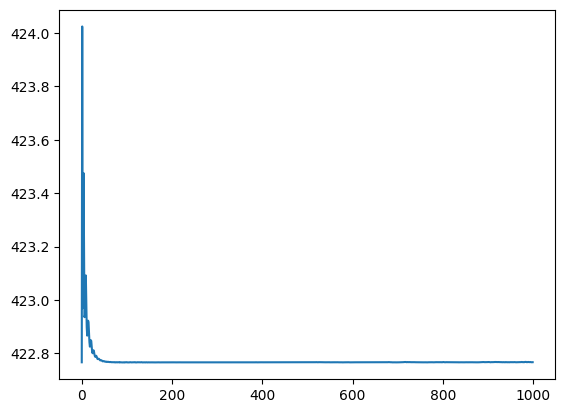

In [114]:
plt.plot(steps, loss_vector)


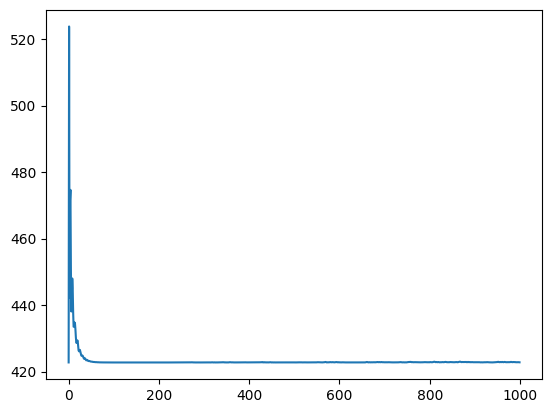

In [110]:
### plot loss_vector_final with steps


In [94]:
 torch.mm(W, H.float())

tensor([[ 5.6664,  2.8977,  3.0132,  ...,  2.0458,  2.1567,  1.9199],
        [ 4.6260,  1.2845,  4.9985,  ...,  2.5648,  1.1643,  3.0633],
        [ 3.4660,  2.1683,  0.5750,  ..., -0.0644,  1.3162,  0.7507],
        ...,
        [ 3.4620,  1.2494,  1.8178,  ...,  1.7621,  1.5941,  1.4515],
        [ 3.0000,  2.3841,  1.9768,  ...,  1.9751,  0.1017,  1.1930],
        [ 4.3805,  1.6102,  2.4719,  ...,  1.9533,  1.9217,  1.7602]],
       grad_fn=<MmBackward0>)

In [95]:
A_tensor.float()

tensor([[4.0000,    nan, 4.0000,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        [   nan,    nan,    nan,  ...,    nan,    nan,    nan],
        ...,
        [2.5000, 2.0000, 2.0000,  ...,    nan,    nan,    nan],
        [3.0000,    nan,    nan,  ...,    nan,    nan,    nan],
        [5.0000,    nan,    nan,  ...,    nan,    nan,    nan]])

In [106]:
def factorize(A, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], 20, requires_grad=True)
    H 
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.1)
    
    # Train the model
    for i in range(100):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [107]:
W, H, loss = factorize(A_tensor, 5)
loss

tensor(189.6028, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

In [92]:
torch.mm(W, H)[mask][20:]

tensor([4.9060, 4.1155, 4.1711,  ..., 4.2348, 4.7364, 2.8415],
       grad_fn=<SliceBackward0>)

In [93]:
A_tensor[mask][20:]

tensor([4., 5., 4.,  ..., 5., 5., 3.], dtype=torch.float64)